# Machine Problem #4: Bayesian Network for Healthcare Diagnosis

In [1]:
#@title Exercise 1: Setting Up the Environment

!pip install pgmpy networkx matplotlib pandas
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.3 MB/s eta 0:00:00


In [2]:
#@title Exercise 2: Define the Bayesian Network Structure
model = BayesianNetwork([
    ('Age', 'Heart Disease'),
    ('Smoking', 'Heart Disease'),
    ('Exercise', 'Heart Disease'),
    ('Cholesterol', 'Heart Disease'),
    ('Blood Pressure', 'Heart Disease'),
    ('Heart Disease', 'Chest Pain'),
    ('Heart Disease', 'ECG Result')
])

In [3]:
#@title Exercise 3: Define Conditional Probability Tables (CPTs)
from pgmpy.factors.discrete import TabularCPD

# Age distribution
cpd_age = TabularCPD(variable='Age', variable_card=3,
                     values=[[0.3], [0.5], [0.2]],
                     state_names={'Age': ['Young', 'Middle-aged', 'Old']})

# Smoking status distribution
cpd_smoking = TabularCPD(variable='Smoking', variable_card=2,
                         values=[[0.7], [0.3]],
                         state_names={'Smoking': ['No', 'Yes']})

# Exercise status distribution
cpd_exercise = TabularCPD(variable='Exercise', variable_card=2,
                          values=[[0.6], [0.4]],
                          state_names={'Exercise': ['Regular', 'None']})

# Cholesterol levels distribution
cpd_cholesterol = TabularCPD(variable='Cholesterol', variable_card=2,
                             values=[[0.7], [0.3]],
                             state_names={'Cholesterol': ['Normal', 'High']})

# Blood Pressure distribution
cpd_bp = TabularCPD(variable='Blood Pressure', variable_card=2,
                    values=[[0.8], [0.2]],
                    state_names={'Blood Pressure': ['Normal', 'High']})

# Conditional Probability Table for Heart Disease, depending on multiple risk factors
cpd_heart_disease = TabularCPD(
    variable='Heart Disease', variable_card=2,
    values=[
        # Probability of Heart Disease = No given combinations of parents
        [0.95, 0.9, 0.7, 0.5, 0.85, 0.7, 0.5, 0.3, 0.8, 0.6, 0.4, 0.2, 0.7, 0.5, 0.3, 0.1,
         0.9, 0.8, 0.6, 0.4, 0.75, 0.6, 0.4, 0.2, 0.7, 0.5, 0.3, 0.1, 0.6, 0.4, 0.2, 0.05,
         0.85, 0.75, 0.55, 0.35, 0.7, 0.55, 0.35, 0.2, 0.65, 0.45, 0.25, 0.1, 0.5, 0.3, 0.15, 0.05],
        # Probability of Heart Disease = Yes given combinations of parents
        [0.05, 0.1, 0.3, 0.5, 0.15, 0.3, 0.5, 0.7, 0.2, 0.4, 0.6, 0.8, 0.3, 0.5, 0.7, 0.9,
         0.1, 0.2, 0.4, 0.6, 0.25, 0.4, 0.6, 0.8, 0.3, 0.5, 0.7, 0.9, 0.4, 0.6, 0.8, 0.95,
         0.15, 0.25, 0.45, 0.65, 0.3, 0.45, 0.65, 0.8, 0.35, 0.55, 0.75, 0.9, 0.5, 0.7, 0.85, 0.95]
    ],
    evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'Blood Pressure'],
    evidence_card=[3, 2, 2, 2, 2],
    state_names={'Heart Disease': ['No', 'Yes'],
                 'Age': ['Young', 'Middle-aged', 'Old'],
                 'Smoking': ['No', 'Yes'],
                 'Exercise': ['Regular', 'None'],
                 'Cholesterol': ['Normal', 'High'],
                 'Blood Pressure': ['Normal', 'High']}
)

# Conditional Probability Table for Chest Pain, depending on Heart Disease
cpd_chest_pain = TabularCPD(
    variable='Chest Pain', variable_card=2,
    values=[[0.9, 0.3],
            [0.1, 0.7]],
    evidence=['Heart Disease'],
    evidence_card=[2],
    state_names={'Chest Pain': ['No', 'Yes'],
                 'Heart Disease': ['No', 'Yes']}
)

# Conditional Probability Table for ECG Result, depending on Heart Disease
cpd_ecg = TabularCPD(
    variable='ECG Result', variable_card=2,
    values=[[0.8, 0.2],
            [0.2, 0.8]],
    evidence=['Heart Disease'],
    evidence_card=[2],
    state_names={'ECG Result': ['Normal', 'Abnormal'],
                 'Heart Disease': ['No', 'Yes']}
)

# Add CPDs to the model
model.add_cpds(cpd_age, cpd_smoking, cpd_exercise, cpd_cholesterol, cpd_bp,
               cpd_heart_disease, cpd_chest_pain, cpd_ecg)


In [4]:
#@title Exercise 4: Inference in the Bayesian Network
infer = VariableElimination(model)
result = infer.query(variables=['Heart Disease'],
                     evidence={'Age': 'Middle-aged',
                              'Smoking': 'Yes',
                              'Cholesterol': 'High',
                              'Blood Pressure': 'High'})
print(result)



+--------------------+----------------------+
| Heart Disease      |   phi(Heart Disease) |
+====================+======================+
| Heart Disease(No)  |               0.0800 |
+--------------------+----------------------+
| Heart Disease(Yes) |               0.9200 |
+--------------------+----------------------+


In [10]:
#@title Exercise 5: Parameter Learning from Simulated Data
import numpy as np
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.choice(['Young', 'Middle-aged', 'Old'], size=1000, p=[0.3, 0.4, 0.3]),
    'Smoking': np.random.choice(['Yes', 'No'], size=1000, p=[0.6, 0.4]),
    'Exercise': np.random.choice(['Regular', 'None'], size=1000, p=[0.7, 0.3]),
    'Cholesterol': np.random.choice(['Normal', 'High'], size=1000, p=[0.6, 0.4]),
    'Blood Pressure': np.random.choice(['Normal', 'High'], size=1000, p=[0.8, 0.2]),
    'Chest Pain': np.random.choice(['No', 'Yes'], size=1000, p=[0.9, 0.1]),
    'ECG Result': np.random.choice(['Normal', 'Abnormal'], size=1000, p=[0.7, 0.3]),
    'Heart Disease': np.random.choice(['No', 'Yes'], size=1000, p=[0.8, 0.2]) # Simulate Heart Disease
})


from pgmpy.estimators import ExpectationMaximization
# Provide state_names to the estimator
state_names = {
    'Age': ['Young', 'Middle-aged', 'Old'],
    'Smoking': ['No', 'Yes'],
    'Exercise': ['Regular', 'None'],
    'Cholesterol': ['Normal', 'High'],
    'Blood Pressure': ['Normal', 'High'],
    'Heart Disease': ['No', 'Yes'],
    'Chest Pain': ['No', 'Yes'],
    'ECG Result': ['Normal', 'Abnormal']
}
# Pass data to the ExpectationMaximization constructor
em = ExpectationMaximization(model, data, state_names=state_names)  # Create EM instance with state_names and data



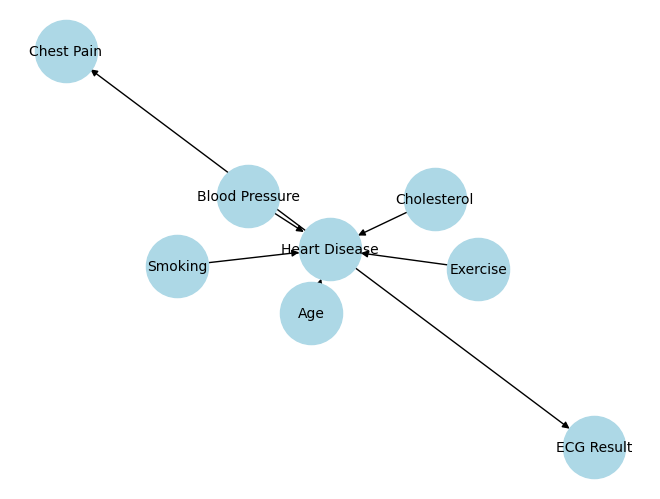

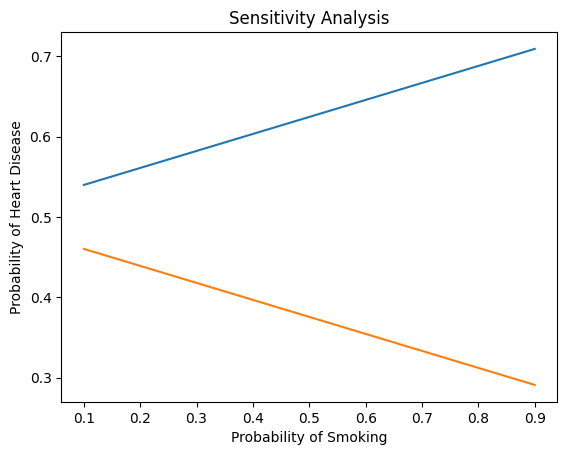

In [9]:
#@title Exercise 6: Network Visualization and Analysis
# Convert the Bayesian Network to a NetworkX DiGraph explicitly
graph = nx.DiGraph(model.edges()) # Convert the model edges to a directed graph

# Now draw the NetworkX graph
nx.draw(graph, with_labels=True, node_size=2000, node_color='lightblue', font_size=10)
plt.show()

smoking_probs = []
smoking_range = np.linspace(0.1, 0.9, 10)
for p in smoking_range:
    # Create a new TabularCPD for Smoking with the updated probability
    cpd_smoking_updated = TabularCPD(variable='Smoking', variable_card=2, values=[[p], [1-p]],
                                    state_names={'Smoking': ['No', 'Yes']})
    # Replace the existing CPD for Smoking in the model
    model.add_cpds(cpd_smoking_updated)
    infer = VariableElimination(model)
    prob = infer.query(variables=['Heart Disease'])
    smoking_probs.append(prob.values)

plt.plot(smoking_range, smoking_probs)
plt.xlabel('Probability of Smoking')
plt.ylabel('Probability of Heart Disease')
plt.title('Sensitivity Analysis')
plt.show()